In [1]:
from glob import glob
import pandas as pd
import os
import sys
import os

sys.path.append("../../")
from src.metadata import adding_metadata

train_path_dir = '/data/cristian/projects/med_data/rise-miccai/task-1/'
val_path_dir   = '/data/cristian/projects/med_data/rise-miccai/task-1-val/'

val_list_paths = glob(os.path.join(val_path_dir,'*/**/*.gz'),recursive=True)
train_list_paths = glob(os.path.join(train_path_dir,'*/**/*.gz'),recursive=True)
train_list_paths_target = glob(os.path.join(train_path_dir,'*/**/*.csv'),recursive=True)

In [2]:
print("Number of training files       :", len(train_list_paths))
print("Number of validation files     :", len(val_list_paths))
print("Number of training train files:", len(train_list_paths_target))
print("Sample training file path      :", train_list_paths[0])
print("Sample training file train    :", train_list_paths_target[0])

Number of training files       : 529
Number of validation files     : 42
Number of training train files: 182
Sample training file path      : /data/cristian/projects/med_data/rise-miccai/task-1/369/155881369/LISA_0001_LF_axi.nii.gz
Sample training file train    : /data/cristian/projects/med_data/rise-miccai/task-1/225/160636225/LISA_LF_QC_2025.csv


In [3]:
df_train          = pd.read_csv(train_list_paths_target[0])
df_train_path_aux = pd.DataFrame(train_list_paths, columns=['path'])
df_train_path_aux['filename'] = df_train_path_aux['path'].apply(lambda x: x.split('/')[-1])
df_train = df_train.merge(df_train_path_aux, on='filename', how='left')
del df_train_path_aux


df_test = pd.DataFrame(val_list_paths, columns=['path'])
df_test['filename'] = df_test['path'].apply(lambda x: x.split('/')[-1])
df_train["patient_id"]  = df_train["filename"].str.extract(r"(LISA_\d+)")
df_test["patient_id"]   = df_test["filename"].str.extract(r"(LISA_VALIDATION_\d+)")

print("shape of train file:", df_train.shape)
print("shape of test  file:", df_test.shape)
df_train.head()

shape of train file: (529, 10)
shape of test  file: (42, 3)


,filename,Noise,Zipper,Positioning,Banding,Motion,Contrast,Distortion,path,patient_id
0,LISA_0001_LF_axi.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001
1,LISA_0001_LF_cor.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001
2,LISA_0001_LF_sag.nii.gz,0,0,0,0,0,0,1,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001
3,LISA_0002_LF_axi.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0002
4,LISA_0002_LF_cor.nii.gz,0,0,0,0,0,0,2,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0002


In [4]:
df_test.head()

,path,filename,patient_id
0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_LF_axi.nii.gz,LISA_VALIDATION_0001
1,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0002_LF_axi.nii.gz,LISA_VALIDATION_0002
2,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0002_LF_cor.nii.gz,LISA_VALIDATION_0002
3,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_LF_cor.nii.gz,LISA_VALIDATION_0001
4,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_LF_sag.nii.gz,LISA_VALIDATION_0001


In [5]:
df_train = adding_metadata(df_train)
df_test  = adding_metadata(df_test)
print("shape of train file:", df_train.shape)
print("shape of test  file:", df_test.shape)
df_train.head()

  5%|▌         | 29/529 [00:00<00:08, 56.11it/s]

100%|██████████| 42/42 [00:00<00:00, 68.18it/s]


shape of train file: (529, 17)
shape of test  file: (42, 10)


,filename,Noise,Zipper,Positioning,Banding,Motion,Contrast,Distortion,path,patient_id,dim_x,dim_y,dim_z,spacing_x,spacing_y,spacing_z,view
0,LISA_0001_LF_axi.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001,36,120,146,5.0,1.5,1.5,axi
1,LISA_0001_LF_cor.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001,40,120,120,5.0,1.5,1.5,cor
2,LISA_0001_LF_sag.nii.gz,0,0,0,0,0,0,1,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001,36,146,120,5.0,1.5,1.5,sag
3,LISA_0002_LF_axi.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0002,40,120,146,5.0,1.5,1.5,axi
4,LISA_0002_LF_cor.nii.gz,0,0,0,0,0,0,2,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0002,40,120,134,5.0,1.5,1.5,cor


In [23]:
df_test.head()

,path,filename,patient_id,dim_x,dim_y,dim_z,spacing_x,spacing_y,spacing_z,view
0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_LF_axi.nii.gz,LISA_VALIDATION_0001,36,120,146,5.0,1.5,1.5,axi
1,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0002_LF_axi.nii.gz,LISA_VALIDATION_0002,40,120,146,5.0,1.5,1.5,axi
2,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0002_LF_cor.nii.gz,LISA_VALIDATION_0002,40,120,134,5.0,1.5,1.5,cor
3,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_LF_cor.nii.gz,LISA_VALIDATION_0001,40,120,120,5.0,1.5,1.5,cor
4,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_LF_sag.nii.gz,LISA_VALIDATION_0001,36,146,120,5.0,1.5,1.5,sag


In [24]:
df_train['patient_id'].value_counts()

patient_id
LISA_0001    3
LISA_0074    3
LISA_0094    3
LISA_0095    3
LISA_0096    3
            ..
LISA_2030    1
LISA_2029    1
LISA_2028    1
LISA_2027    1
LISA_2100    1
Name: count, Length: 241, dtype: int64

In [25]:
df_test['patient_id'].value_counts()

patient_id
LISA_VALIDATION_0001    3
LISA_VALIDATION_0002    3
LISA_VALIDATION_0003    3
LISA_VALIDATION_0004    3
LISA_VALIDATION_0005    3
LISA_VALIDATION_0006    3
LISA_VALIDATION_0007    3
LISA_VALIDATION_0008    3
LISA_VALIDATION_0009    3
LISA_VALIDATION_0010    3
LISA_VALIDATION_0011    3
LISA_VALIDATION_0012    3
LISA_VALIDATION_0013    3
LISA_VALIDATION_0014    3
Name: count, dtype: int64

In [26]:
df_test.head()

,path,filename,patient_id,dim_x,dim_y,dim_z,spacing_x,spacing_y,spacing_z,view
0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_LF_axi.nii.gz,LISA_VALIDATION_0001,36,120,146,5.0,1.5,1.5,axi
1,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0002_LF_axi.nii.gz,LISA_VALIDATION_0002,40,120,146,5.0,1.5,1.5,axi
2,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0002_LF_cor.nii.gz,LISA_VALIDATION_0002,40,120,134,5.0,1.5,1.5,cor
3,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_LF_cor.nii.gz,LISA_VALIDATION_0001,40,120,120,5.0,1.5,1.5,cor
4,/data/cristian/projects/med_data/rise-miccai/t...,LISA_VALIDATION_0001_LF_sag.nii.gz,LISA_VALIDATION_0001,36,146,120,5.0,1.5,1.5,sag


In [27]:
# save datasets preprocessing ../results/preprocessed_data/
results_dir = '../../results/preprocessed_data/'
os.makedirs(results_dir, exist_ok=True)
df_train.to_csv(os.path.join(results_dir, 'df_train.csv'), index=False)
df_test.to_csv(os.path.join(results_dir, 'df_test.csv'), index=False)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   filename     529 non-null    object 
 1   Noise        529 non-null    int64  
 2   Zipper       529 non-null    int64  
 3   Positioning  529 non-null    int64  
 4   Banding      529 non-null    int64  
 5   Motion       529 non-null    int64  
 6   Contrast     529 non-null    int64  
 7   Distortion   529 non-null    int64  
 8   path         529 non-null    object 
 9   patient_id   529 non-null    object 
 10  dim_x        529 non-null    int64  
 11  dim_y        529 non-null    int64  
 12  dim_z        529 non-null    int64  
 13  spacing_x    529 non-null    float32
 14  spacing_y    529 non-null    float32
 15  spacing_z    529 non-null    float32
 16  view         529 non-null    object 
dtypes: float32(3), int64(10), object(4)
memory usage: 64.2+ KB


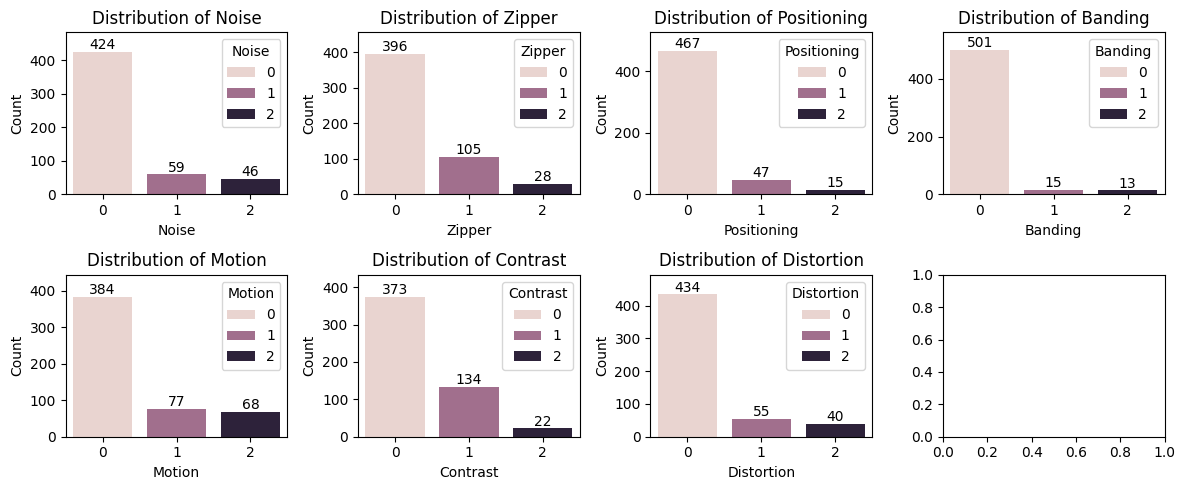

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 5))

# List of columns to plot
columns = ["Noise", "Zipper", "Positioning", "Banding", "Motion", "Contrast", "Distortion"]
axes = axes.flatten()  # Flatten the axes array to iterate over

# Loop over each column and plot its distribution
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df_train, ax=axes[i], hue=column)
    # Add the count numbers on top of each bar
    for p in axes[i].patches:
        if p.get_height() > 0:  # Only annotate if the height is greater
          axes[i].annotate(f'{int(p.get_height())}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='center', 
                          fontsize=10, color='black', 
                          xytext=(0, 5), textcoords='offset points')
    
    # Increase the upper limit of the y-axis by 5 units to make space for annotations
    axes[i].set_ylim(0, max([p.get_height() for p in axes[i].patches]) + 60)
    
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


In [30]:
df_train.head(3)

,filename,Noise,Zipper,Positioning,Banding,Motion,Contrast,Distortion,path,patient_id,dim_x,dim_y,dim_z,spacing_x,spacing_y,spacing_z,view
0,LISA_0001_LF_axi.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001,36,120,146,5.0,1.5,1.5,axi
1,LISA_0001_LF_cor.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001,40,120,120,5.0,1.5,1.5,cor
2,LISA_0001_LF_sag.nii.gz,0,0,0,0,0,0,1,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001,36,146,120,5.0,1.5,1.5,sag


In [31]:
df_train.head(3)

,filename,Noise,Zipper,Positioning,Banding,Motion,Contrast,Distortion,path,patient_id,dim_x,dim_y,dim_z,spacing_x,spacing_y,spacing_z,view
0,LISA_0001_LF_axi.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001,36,120,146,5.0,1.5,1.5,axi
1,LISA_0001_LF_cor.nii.gz,0,0,0,0,0,0,0,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001,40,120,120,5.0,1.5,1.5,cor
2,LISA_0001_LF_sag.nii.gz,0,0,0,0,0,0,1,/data/cristian/projects/med_data/rise-miccai/t...,LISA_0001,36,146,120,5.0,1.5,1.5,sag


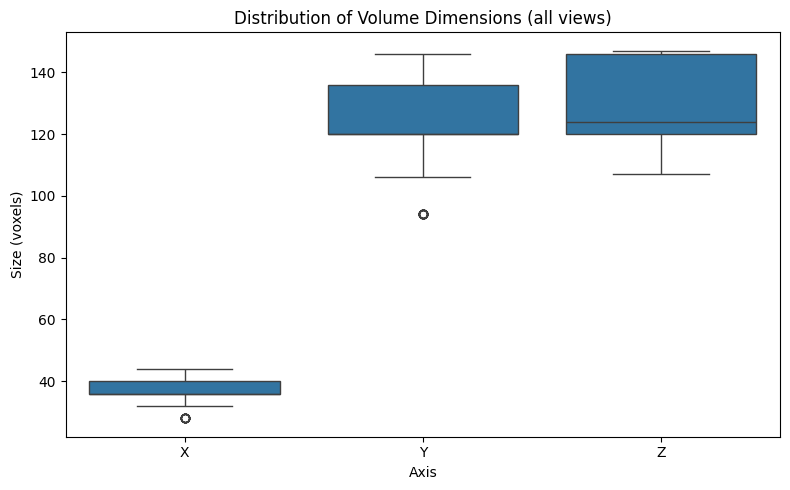

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que ya tienes df_train con columnas: dim_x, dim_y, dim_z, spacing_x, spacing_y, spacing_z, view

# 🔁 Convertir a formato largo (long-form) para seaborn
df_dims = df_train[["dim_x", "dim_y", "dim_z"]].rename(
    columns={"dim_x": "X", "dim_y": "Y", "dim_z": "Z"}
).melt(var_name="Axis", value_name="Dimension")

plt.figure(figsize=(8, 5))
sns.boxplot(x="Axis", y="Dimension", data=df_dims)
plt.title("Distribution of Volume Dimensions (all views)")
plt.ylabel("Size (voxels)")
plt.xlabel("Axis")
plt.tight_layout()
plt.show()


In [33]:
df_train["dim_x"].value_counts()

dim_x
36    256
40    202
44     50
28     12
32      9
Name: count, dtype: int64

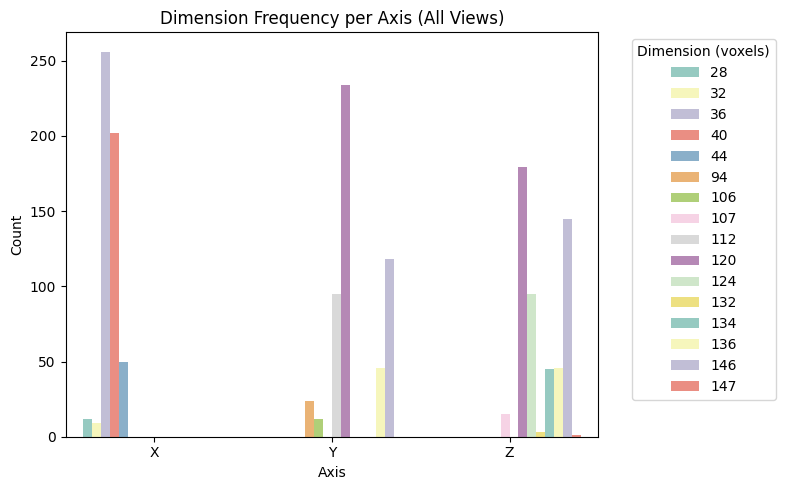

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir a formato largo
df_dims = df_train[["dim_x", "dim_y", "dim_z"]].rename(
    columns={"dim_x": "X", "dim_y": "Y", "dim_z": "Z"}
).melt(var_name="Axis", value_name="Dimension")

plt.figure(figsize=(8, 5))
sns.countplot(data=df_dims, x="Axis", hue="Dimension", palette="Set3")
plt.title("Dimension Frequency per Axis (All Views)")
plt.ylabel("Count")
plt.xlabel("Axis")
plt.legend(title="Dimension (voxels)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


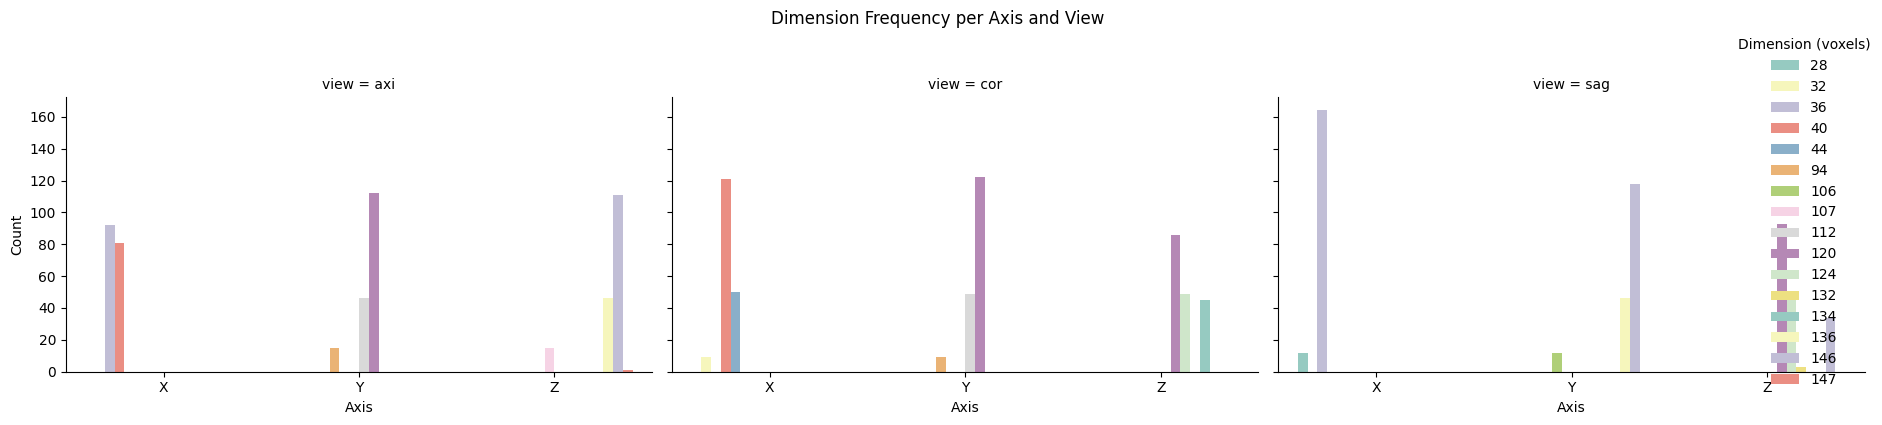

In [35]:
# Convertir a formato largo con vista incluida
df_dims_view = df_train[["view", "dim_x", "dim_y", "dim_z"]].rename(
    columns={"dim_x": "X", "dim_y": "Y", "dim_z": "Z"}
).melt(id_vars="view", var_name="Axis", value_name="Dimension")

g = sns.catplot(
    data=df_dims_view,
    kind="count",
    x="Axis",
    hue="Dimension",
    col="view",
    palette="Set3",
    height=4,
    aspect=1.5
)

g.fig.suptitle("Dimension Frequency per Axis and View", y=1.05)
g.set_axis_labels("Axis", "Count")
g._legend.set_title("Dimension (voxels)")
plt.tight_layout()
plt.show()


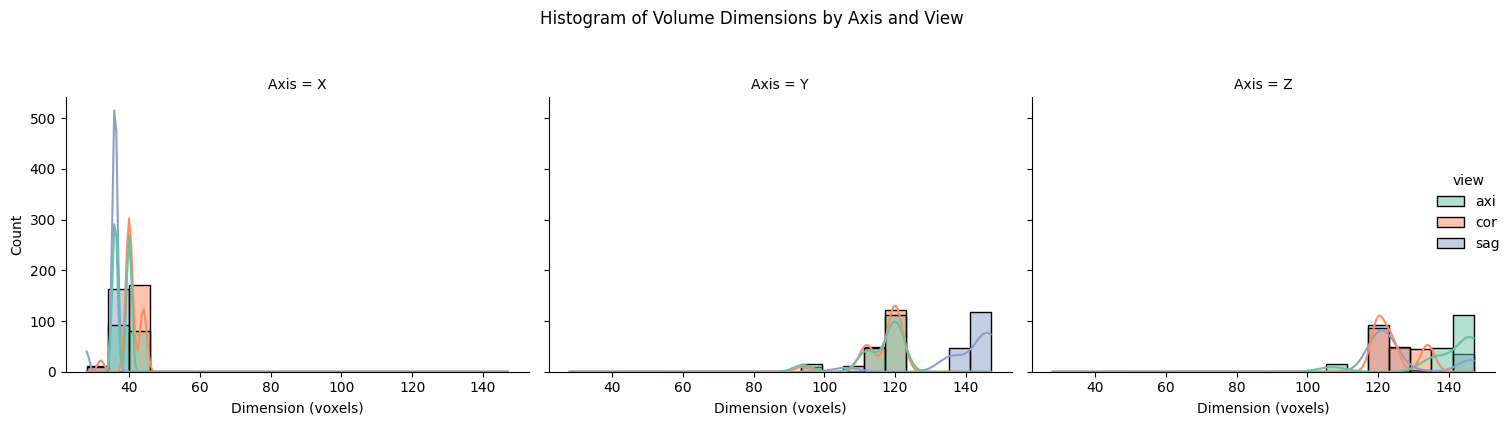

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Long-form con vista
df_dims_view = df_train[["view", "dim_x", "dim_y", "dim_z"]].rename(
    columns={"dim_x": "X", "dim_y": "Y", "dim_z": "Z"}
).melt(id_vars="view", var_name="Axis", value_name="Dimension")

# 🔄 Graficar por cada axis en subplots separados por columna
g = sns.displot(
    data=df_dims_view,
    x="Dimension",
    col="Axis",
    hue="view",
    kind="hist",
    bins=20,
    kde=True,
    height=4,
    aspect=1.2,
    common_norm=False,
    palette="Set2"
)

g.set_axis_labels("Dimension (voxels)", "Count")
g.fig.suptitle("Histogram of Volume Dimensions by Axis and View", y=1.05)
plt.tight_layout()
plt.show()


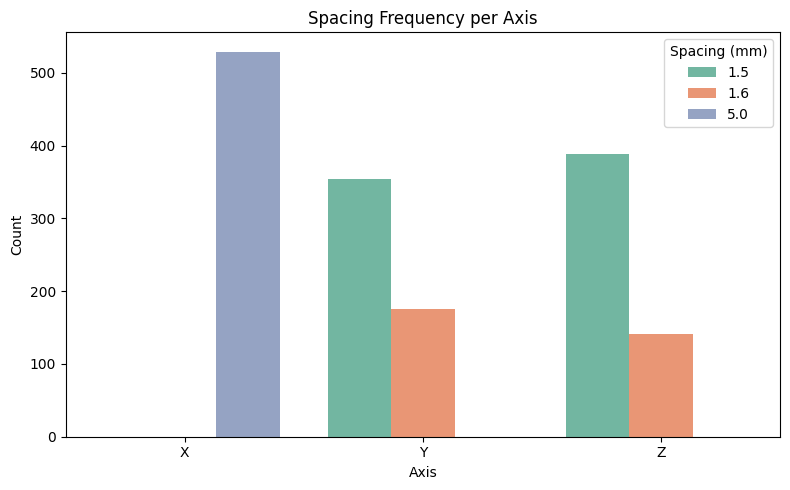

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reutiliza tu dataframe long-form para spacings
df_spacings = df_train[["spacing_x", "spacing_y", "spacing_z"]].rename(
    columns={"spacing_x": "X", "spacing_y": "Y", "spacing_z": "Z"}
).melt(var_name="Axis", value_name="Spacing")

plt.figure(figsize=(8, 5))
sns.countplot(data=df_spacings, x="Axis", hue="Spacing", palette="Set2")
plt.title("Spacing Frequency per Axis")
plt.ylabel("Count")
plt.xlabel("Axis")
plt.legend(title="Spacing (mm)")
plt.tight_layout()
plt.show()


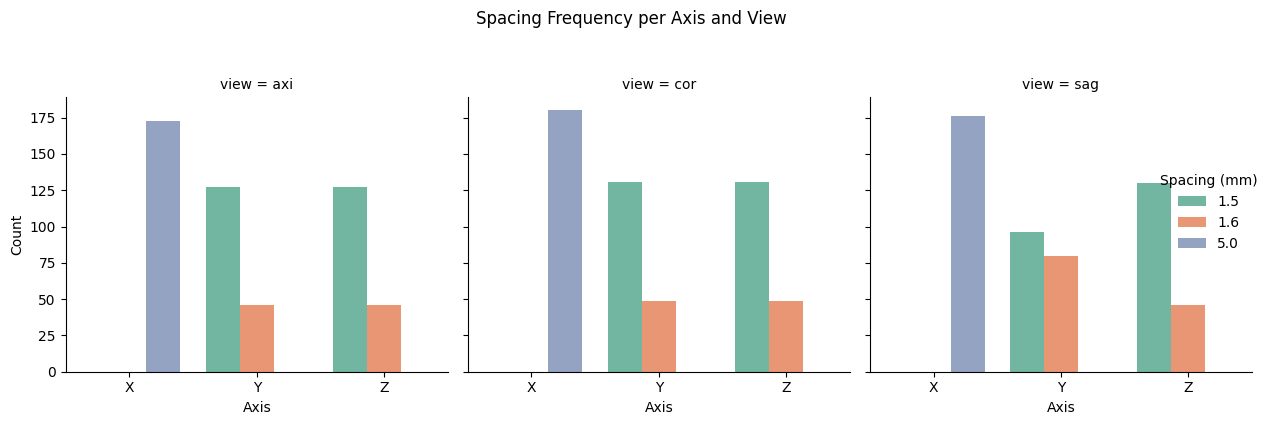

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir a formato largo (long-form) incluyendo la vista
df_spacings_view = df_train[["view", "spacing_x", "spacing_y", "spacing_z"]].rename(
    columns={"spacing_x": "X", "spacing_y": "Y", "spacing_z": "Z"}
).melt(id_vars="view", var_name="Axis", value_name="Spacing")

# Graficar por subplots separados por view
g = sns.catplot(
    data=df_spacings_view,
    kind="count",
    x="Axis",
    hue="Spacing",
    col="view",
    palette="Set2",
    height=4,
    aspect=1
)

g.fig.suptitle("Spacing Frequency per Axis and View", y=1.05)
g.set_axis_labels("Axis", "Count")
g._legend.set_title("Spacing (mm)")
plt.tight_layout()
plt.show()


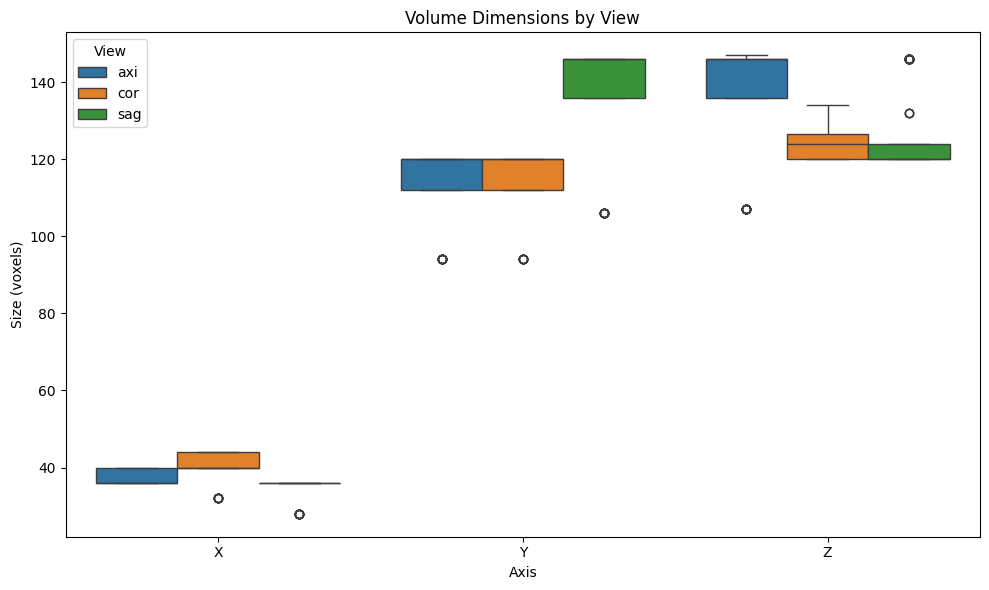

In [39]:
df_dims_view = df_train[["view", "dim_x", "dim_y", "dim_z"]].rename(
    columns={"dim_x": "X", "dim_y": "Y", "dim_z": "Z"}
).melt(id_vars="view", var_name="Axis", value_name="Dimension")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Axis", y="Dimension", hue="view", data=df_dims_view)
plt.title("Volume Dimensions by View")
plt.ylabel("Size (voxels)")
plt.xlabel("Axis")
plt.legend(title="View")
plt.tight_layout()
plt.show()


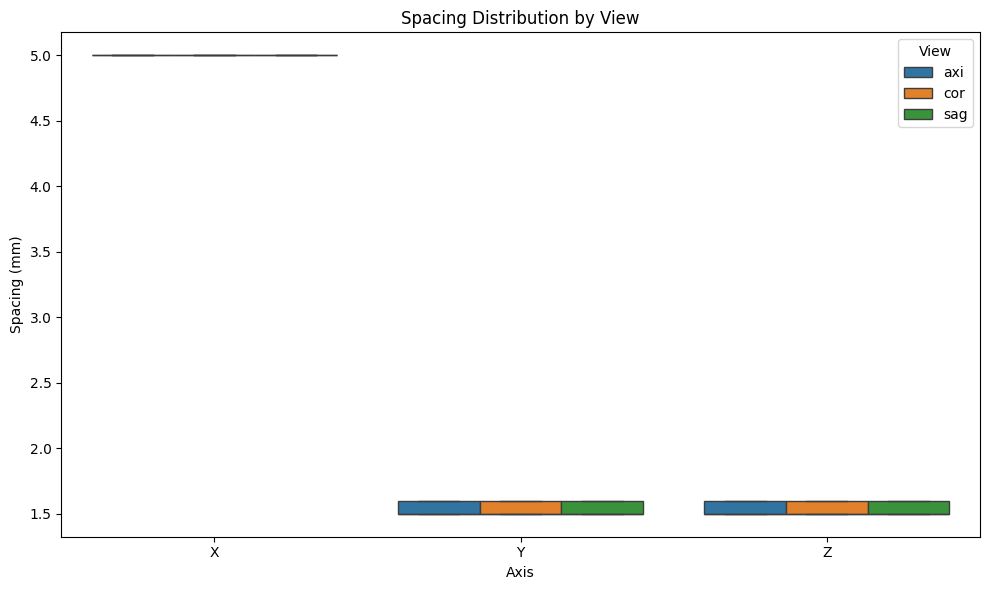

In [40]:
df_spacing_view = df_train[["view", "spacing_x", "spacing_y", "spacing_z"]].rename(
    columns={"spacing_x": "X", "spacing_y": "Y", "spacing_z": "Z"}
).melt(id_vars="view", var_name="Axis", value_name="Spacing")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Axis", y="Spacing", hue="view", data=df_spacing_view)
plt.title("Spacing Distribution by View")
plt.ylabel("Spacing (mm)")
plt.xlabel("Axis")
plt.legend(title="View")
plt.tight_layout()
plt.show()
